In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = px.data.gapminder()

# Matplotlib

In [4]:
# Importar datos
datos = pd.read_csv('https://raw.githubusercontent.com/jgchaparro/visualizacion_ironhack_19_01_2023/main/Datasets/PIB%20per%20capita%20largo%20(d%C3%B3lares%20de%202010).csv')

# Utilizar datos de España
españa = datos[datos['country'] == 'Spain']
españa.head(5)

,country,year,value
28,Spain,1960,6220
115,Spain,1961,6890
206,Spain,1962,7500
297,Spain,1963,8150
388,Spain,1964,8500


### 1) Muestra el PIB de España con un gráfico de línea

- Usa la variable `datos`

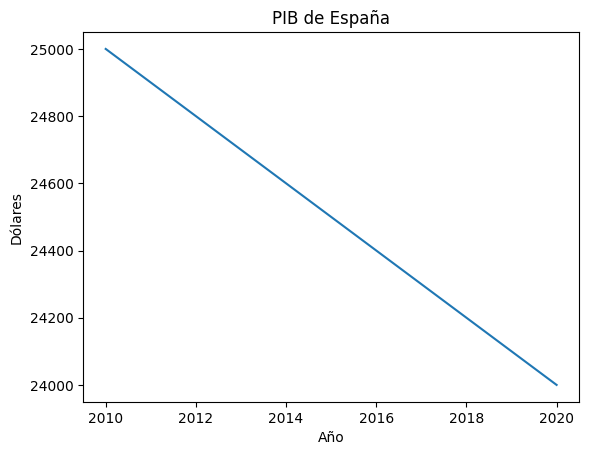

In [ ]:
datos = españa

...

fig, ax = plt.subplots()
ax.plot('year', 'value', data = españa)
ax.set_title('PIB de España')
ax.set_xlabel('Año')
ax.set_ylabel('Dólares');

### 2) Muestra el PIB de España con un gráfico de barras

- Usa la variable `datos`
- Cambia el color de las barras a rojo

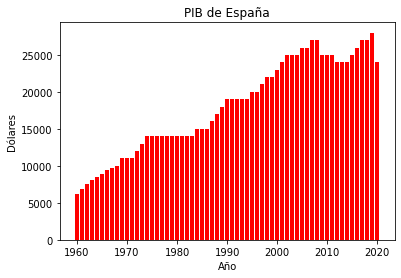

In [5]:
datos = españa

...

fig, ax = plt.subplots()
ax.bar('year', 'value', data = españa, color = 'red')
ax.set_title('PIB de España')
ax.set_xlabel('Año')
ax.set_ylabel('Dólares');

#### 3) Une los dos gráficos anteriores en subplots

- Usa las variables `datos_pre_1976` y `datos_post_1976`
- Crea una imagen con 4 subplots: 2 por fila y 2 por columna.
- Los gráficos de la primera columna deben ir en naranja; los de la segunda, en naranja.

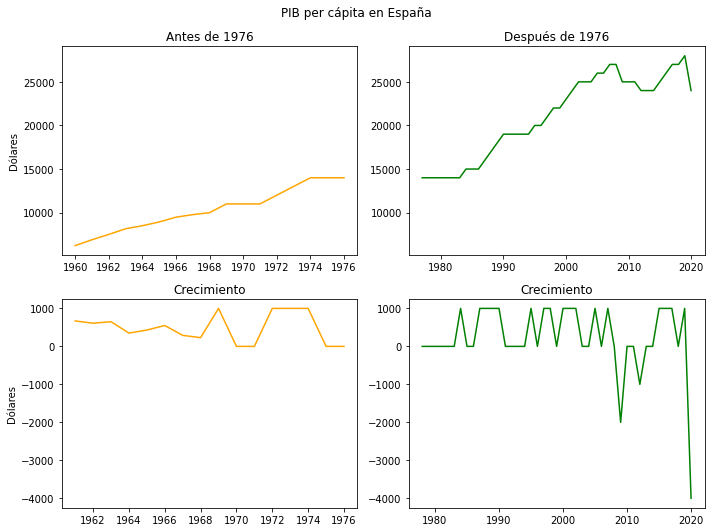

In [6]:
datos_pre_1976 = españa[españa['year'] <= 1976].copy()
datos_post_1976 = españa[españa['year'] > 1976].copy()

datos_pre_1976['year'] = datos_pre_1976['year'].astype(int)
datos_post_1976['year'] = datos_post_1976['year'].astype(int)

datos_pre_1976['crecimiento'] = datos_pre_1976['value'].diff()
datos_post_1976['crecimiento'] = datos_post_1976['value'].diff()

...

# Crea los subplots
fig, axs = plt.subplots(2, 2, figsize = (10, 7.5))

# Grafica los datos anteriores a 1976
axs[0, 0].plot('year', 'value',  data = datos_pre_1976, color = 'orange')
axs[1, 0].plot('year', 'crecimiento', data = datos_pre_1976, color = 'orange')

# Grafica los datos posteriores a 1976
axs[0, 1].plot('year', 'value', data = datos_post_1976, color = 'green')
axs[1, 1].plot('year','crecimiento', data = datos_post_1976, color = 'green')

# Añadir títulos
fig.suptitle('PIB per cápita en España')
axs[0, 0].set_title('Antes de 1976')
axs[0, 1].set_title('Después de 1976')
axs[1, 0].set_title('Crecimiento')
axs[1, 1].set_title('Crecimiento')

# Añadir etiquetas a los ejes
axs[0, 0].set_ylabel('Dólares')
axs[1, 0].set_ylabel('Dólares')

# ADICIONAL: Corregir floats en primera columna
axs[0, 0].locator_params(integer=True)
axs[1, 0].locator_params(integer=True)

# ADICIONAL: compartir ejes por filas
axs[0, 0].sharey(axs[0, 1])
axs[1, 0].sharey(axs[1, 1])

# Aplica tight_layout() para evitar superposiciones
fig.tight_layout()

# Seaborn

### 1) Grafica el PIB per cápita de España por años con un gráfico de línea en Seaborn

- Utiliza la variable `datos`
- Añade un título al gráfico y a los ejes horizontal y vertical
- Cambia el color de la línea

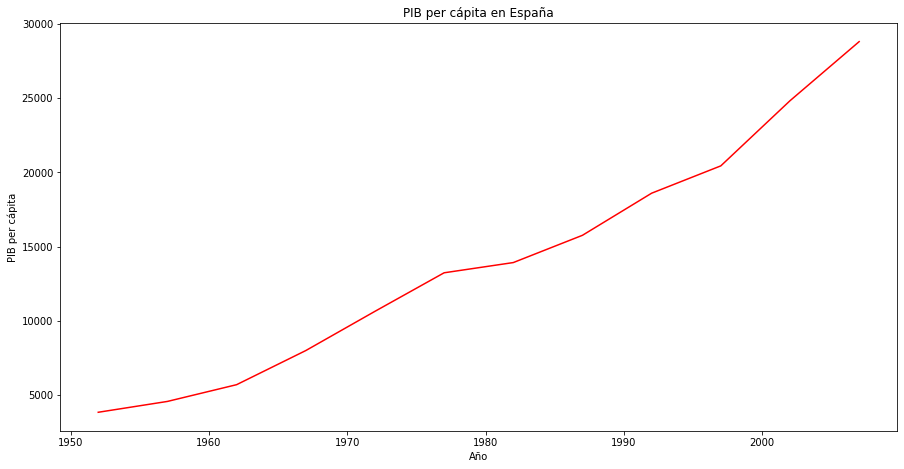

In [3]:
datos = data.query('country == "Spain"')

...

fig, ax = plt.subplots(figsize = (15, 7.5))
fig = sns.lineplot(
    data = datos,
    x = 'year',
    y = 'gdpPercap',
    color = 'red',
)

fig.set_title('PIB per cápita en España')
fig.set_xlabel('Año')
fig.set_ylabel('PIB per cápita');

### 2) Grafica la correlacción entre variables con un heatmap en Seaborn

- Utiliza la variable `datos`
- Utiliza `paleta` como argumento para el parámetro `cmap` del heatmap
- Define los parámetros `vmin` y `vmax` como -1 y 1
- Muestra la correlación en número dentro de la celda
- Tamaño recomendado: (10, 8) 

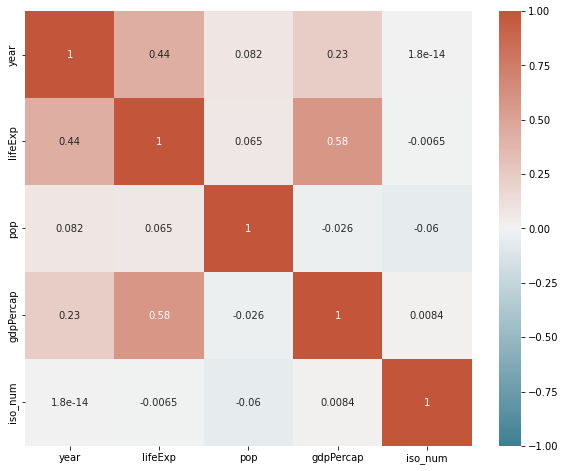

In [4]:
datos = data.corr()
paleta = sns.diverging_palette(220, 20, as_cmap=True) # Paleta roja y azul

...

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(
    datos, 
    cmap = paleta,
    center = 0,
    vmin = -1,
    vmax = 1,
    annot = True);


### 3) Grafica la dsitribución de la esperanza de vida en 2007 con Seaborn 

- Utiliza el tamaño de imagen (10, 10)

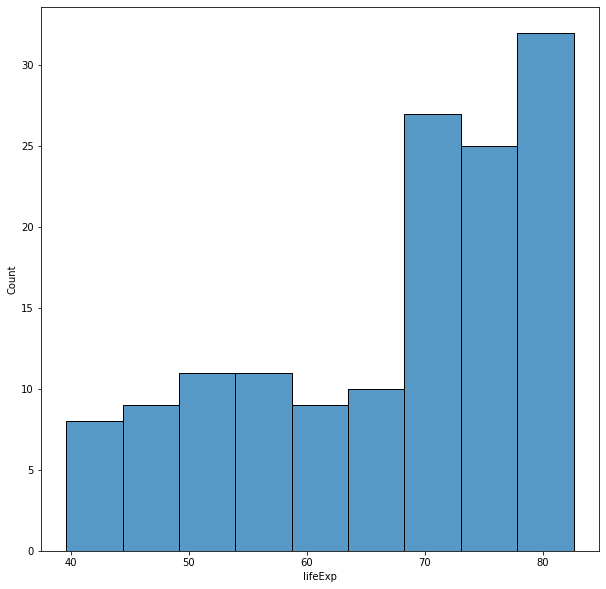

In [11]:
datos = data.query('year == 2007')

...

fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.histplot(
    datos,
    x = 'lifeExp',
)

### 4) Grafica la distribución de la esperanza de vida en 2007 separando por continente con Seaborn 

Tendrás que utilizar el gráfico de imagen `sns.displot`

- Utiliza la variable `datos`
- Pon cada plot en una columna distinta
- Pon un color distinto a cada continente
- Prueba a añadir la estimación de la densidad de distribución (`kde`)

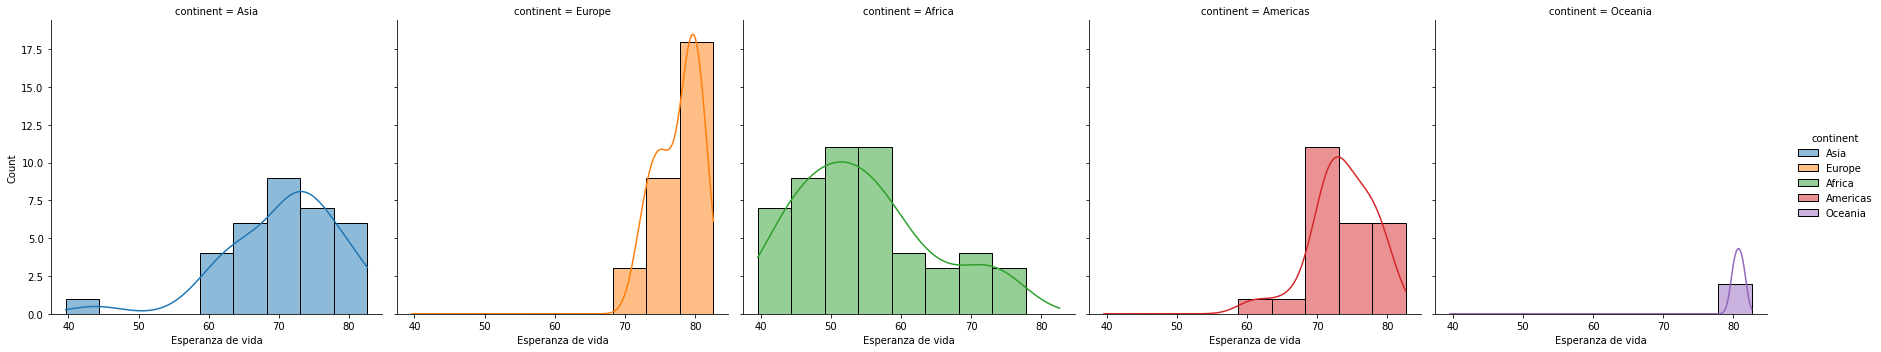

In [24]:
datos = data.query('year == 2007')

...

fig = sns.displot(
    datos,
    x = 'lifeExp',
    hue = 'continent',
    kind = 'hist',
    col = 'continent',
    kde = True
)

fig.set(xlabel = 'Esperanza de vida');

# Plotly Express

### 1) Grafica el PIB per cápita de Alemania por años con un gráfico de barras (barplot) en Plotly

* Utiliza la variable `datos`
* Añade un título
* Cambia las etiquetas de los ejes horizontal y vertical
* Centra el título del gráfico 

In [25]:
datos = data.query('country == "Germany"')

...

fig = px.bar(
    datos,
    x = 'year',
    y = 'gdpPercap',
    labels = {
        'gdpPercap' : 'PIB per cápita',
        'year' : 'Año'
    },
    color_discrete_sequence = ['black'],
    title = 'PIB per cápita en Alemania'
)

fig.update_layout(title_x = 0.5)

### 2) Grafica la distribución de la esperanza de vida por continente en 2007 con un gráfico de cajas (boxplot) en Plotly

- Cambia las etiquetas de los ejes horizontal y vertical
- Pon un color distinto a cada continente

In [7]:
datos = data.query('year == 2007')

...

px.box(
    datos,
    x = 'continent',
    y = 'lifeExp',
    color = 'continent',
    labels = {
        'lifeExp' : 'Esperanza de vida',
        'continent' : 'Continente'
    }
)

#### 3) Añade una animación al gráfico anterior

- Utiliza la variable `datos`, que contiene datos históricos
- Limita el rango del eje Y a 30 y 90
 

In [28]:
datos = data

px.box(
    datos,
    x = 'continent',
    y = 'lifeExp',
    range_y = [30, 90],
    color = 'continent',
    labels = {
        'lifeExp' : 'Esperanza de vida',
        'continent' : 'Continente'
    },

    animation_frame = 'year',
    animation_group = 'country'
)